<a href="https://colab.research.google.com/github/gr1nick/lab_bigData/blob/master/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Установка TensorFlow Datasets
#!pip install tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Загружаем данные через TensorFlow Datasets
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True, # Загружаем данные в формате (image, label)
)

# Определение размера изображений и размера батча
IMG_SIZE = 150
BATCH_SIZE = 32

# Функция для преобразования изображений
def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

# Применяем функцию преобразования к датасетам
train_ds = train_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)
val_ds = val_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)

# Просмотр информации о датасете для понимания структуры данных
print(ds_info)


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, 

In [ ]:
# Определение модели
model = Sequential([
    Flatten(input_shape=(150, 150, 3)), # Преобразование 2D изображений в одномерный вектор
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Выходной слой с одним нейроном и сигмоидной активацией
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Обучение модели
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)


Epoch 1/10
582/582 [==============================] - 435s 743ms/step - loss: 1.2303 - accuracy: 0.5463 - val_loss: 0.7028 - val_accuracy: 0.5116
Epoch 2/10
582/582 [==============================] - 446s 766ms/step - loss: 0.6907 - accuracy: 0.5644 - val_loss: 0.6902 - val_accuracy: 0.5260
Epoch 3/10
582/582 [==============================] - 447s 768ms/step - loss: 0.6873 - accuracy: 0.5322 - val_loss: 0.6791 - val_accuracy: 0.5748
Epoch 4/10
582/582 [==============================] - 447s 766ms/step - loss: 0.6824 - accuracy: 0.5519 - val_loss: 0.6931 - val_accuracy: 0.5105
Epoch 5/10
582/582 [==============================] - 446s 765ms/step - loss: 0.6893 - accuracy: 0.5207 - val_loss: 0.6928 - val_accuracy: 0.5140
Epoch 6/10
582/582 [==============================] - 438s 752ms/step - loss: 0.6796 - accuracy: 0.5601 - val_loss: 0.6830 - val_accuracy: 0.5533
Epoch 7/10
582/582 [==============================] - 445s 764ms/step - loss: 0.6832 - accuracy: 0.5452 - val_loss: 0.6928 -

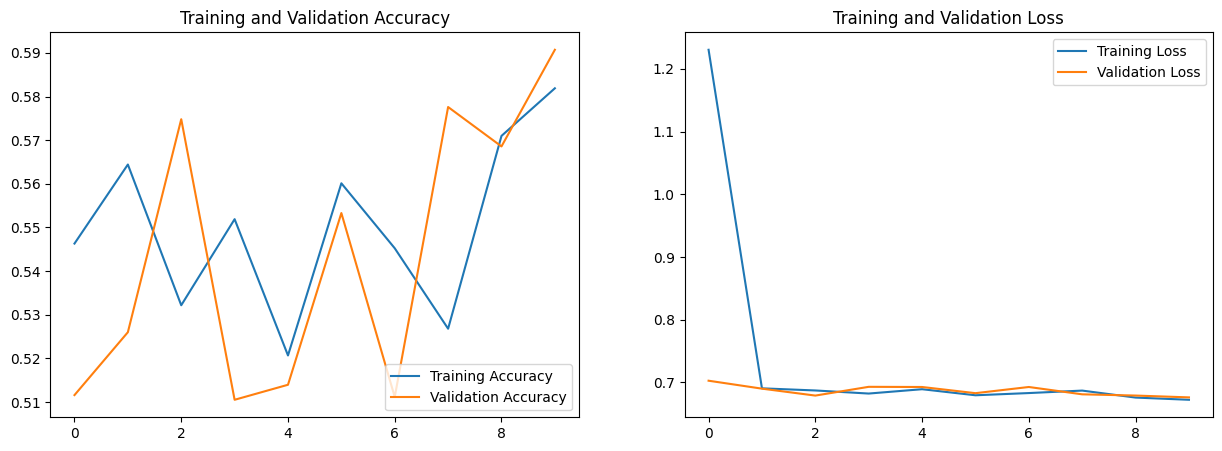

In [ ]:
# Графики точности и потерь
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:


# Определение модели
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Обучение модели
cnn_history = cnn_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)


Epoch 1/10
582/582 [==============================] - 1182s 2s/step - loss: 0.6135 - accuracy: 0.6745 - val_loss: 0.5623 - val_accuracy: 0.7057
Epoch 2/10
582/582 [==============================] - 1174s 2s/step - loss: 0.4626 - accuracy: 0.7794 - val_loss: 0.4851 - val_accuracy: 0.7670
Epoch 3/10
582/582 [==============================] - 1158s 2s/step - loss: 0.3221 - accuracy: 0.8572 - val_loss: 0.5281 - val_accuracy: 0.7698
Epoch 4/10
582/582 [==============================] - 1166s 2s/step - loss: 0.1915 - accuracy: 0.9223 - val_loss: 0.6820 - val_accuracy: 0.7468
Epoch 5/10
582/582 [==============================] - 1190s 2s/step - loss: 0.1209 - accuracy: 0.9543 - val_loss: 0.7972 - val_accuracy: 0.7463
Epoch 6/10
582/582 [==============================] - 1169s 2s/step - loss: 0.0652 - accuracy: 0.9788 - val_loss: 1.0988 - val_accuracy: 0.7530
Epoch 7/10
582/582 [==============================] - 1196s 2s/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 1.1575 - val_accuracy:

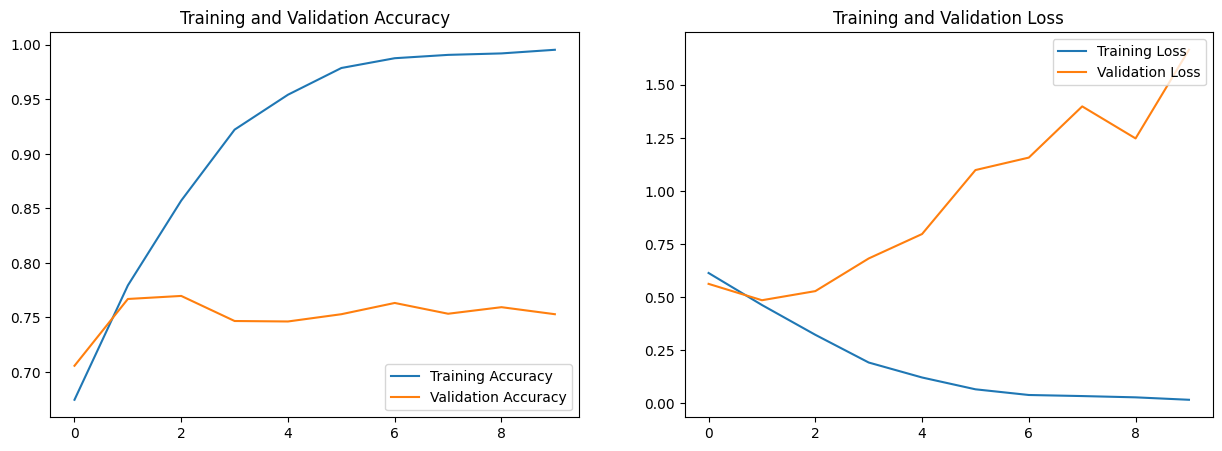

In [ ]:
# Графики потерь и точности
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG19

# Загружаем предобученную модель VGG19, исключая полносвязные слои (include_top=False)
base_model_vgg19 = VGG19(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [ ]:
# Замораживаем веса свёрточной базы
base_model_vgg19.trainable = False


In [ ]:
from tensorflow.keras import layers, models

# Добавление новых слоёв поверх базовой модели
model_vgg19 = models.Sequential([
    base_model_vgg19,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # используем сигмоидальную активацию для бинарной классификации
])


In [ ]:
model_vgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с новыми данными
history_vgg19 = model_vgg19.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
164/582 [=======>......................] - ETA: 1:09:44 - loss: 0.4552 - accuracy: 0.8260

In [ ]:
from tensorflow.keras.applications import ResNet50

# Загружаем предобученную модель ResNet50
base_model_resnet = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [ ]:
# Замораживаем веса свёрточной базы
base_model_resnet.trainable = False


In [ ]:
# Добавление новых слоёв поверх базовой модели
model_resnet = models.Sequential([
    base_model_resnet,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # используем сигмоидальную активацию для бинарной классификации
])


In [ ]:
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с новыми данными
history_resnet = model_resnet.fit(train_ds, epochs=10, validation_data=val_ds)
